In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
import datetime
from datetime import date, timedelta


In [2]:
import clean
import preproc


In [3]:
data1, data2, data3, data4 = clean.get_data()
data = clean.clean_all(data1, data2, data3, data4, clean.get_bairros_data())

In [4]:
data.to_csv("data_cleaned.csv")


In [5]:
preproc_data_n, preproc_data_rate = preproc.get_format(data)

In [6]:
preproc_data_n.to_csv("preproc_data_n.csv")
preproc_data_rate.to_csv("preproc_data_rate.csv")


In [ ]:
def get_train_test(df,n_sequences,length):
    #split ordered dataset into train/test
    len_ = int(0.8*df.shape[0])
    df_train = df[:len_]
    df_test = df[len_:]
    
    test_seq = math.floor(n_sequences/4)
    
    X, y = [], []
    for i in range(n_sequences):
        (xi, yi) = split_subsample_sequence(df_train, length)
        X.append(xi)
        y.append(yi)
    X = np.array(X)
    y = np.array(y)
    
    
    
    
    
    X_train, y_train = get_X_y(df_train, n_sequences, length)
    X_test, y_test = get_X_y(df_test, test_seq, length)
    
    X_train = X_train.reshape(X_train.shape[0], X_train.shape[1],1)
    X_test = X_test.reshape(X_test.shape[0], X_test.shape[1],1)
    
    return X_train, y_train, X_test, y_test

In [ ]:
def get_X_y(df, n_sequences, length):
    '''Return a list of samples (X, y)'''
    X, y = [], []

    for i in range(n_sequences):
        (xi, yi) = split_subsample_sequence(df, length)
        X.append(xi)
        y.append(yi)
        
    X = np.array(X)
    y = np.array(y)
    return X, y

# Univariate LSTM Preproc

Creates train/test data for a single region

In [22]:
Centro_df = preproc.extract_ts(preproc_data_rate,"Centro")["y"]

In [119]:
def subsample_sequence(df, length):
    """
    Given the initial dataframe `df`, return a shorter dataframe sequence of length `length`.
    This shorter sequence should be selected at random
    """
    last_possible = df.shape[0] - length
    
    random_start = np.random.randint(0, last_possible)
    df_sample = df[random_start: random_start+length]

    return df_sample

In [120]:
def split_subsample_sequence(df, length):
    '''Create one single random (X,y) pair'''
    df_subsample = subsample_sequence(df, length)
    pred_len = 3
    y_sample = df_subsample.iloc[length-pred_len:]
    
    X_sample = df_subsample[0:length-pred_len]
    X_sample = X_sample.values
    return np.array(X_sample), np.array(y_sample)

In [121]:
def get_X_y(df, n_sequences, length):
    '''Return a list of samples (X, y)'''
    X, y = [], []

    for i in range(n_sequences):
        (xi, yi) = split_subsample_sequence(df, length)
        X.append(xi)
        y.append(yi)
        
    X = np.array(X)
    y = np.array(y)
    return X, y

In [134]:
def get_X_y_all_AR(df, n_sequences, length):
    '''Return a list of samples (X, y)'''
    regions = list(df.columns.map(lambda x: x[1]))
    X_list=[]
    y_list=[]
    for region in regions:
        X, y = [], []
        AR = preproc.extract_ts(df,region)["y"]
        for i in range(n_sequences):
            (xi, yi) = split_subsample_sequence(AR, length)
            X.append(xi)
            y.append(yi)

        X = np.array(X)
        y = np.array(y)
        X_list.append(X)
        y_list.append(y)

    X_all = np.concatenate(X_list[:])
    y_all = np.concatenate(y_list[:])
    
    return X_all, y_all

In [135]:
import math
def get_train_test_0(df,n_sequences,length):
    '''Returns train and test data for X and y'''
    len_ = int(0.8*df.shape[0])
    df_train = df[:len_]
    df_test = df[len_:]
    
    test_seq = math.floor(n_sequences/4)
    
    X_train, y_train = get_X_y(df_train, n_sequences, length)
    X_test, y_test = get_X_y(df_test, test_seq, length)
    
    X_train = X_train.reshape(X_train.shape[0], X_train.shape[1],1)
    X_test = X_test.reshape(X_test.shape[0], X_test.shape[1],1)
    
    return X_train, y_train, X_test, y_test

In [136]:
def get_train_test_1(data,n_sequences,length,region):
    '''Returns train and test data for X and y'''
    df = preproc.extract_ts(data,region)["y"]
    len_ = int(0.8*df.shape[0])
    df_train = df[:len_]
    df_test = df[len_:]
    
    test_seq = math.floor(n_sequences/4)
    
    X_train, y_train = get_X_y(df_train, n_sequences, length)
    X_test, y_test = get_X_y(df_test, test_seq, length)
    
    X_train = X_train.reshape(X_train.shape[0], X_train.shape[1],1)
    X_test = X_test.reshape(X_test.shape[0], X_test.shape[1],1)
    
    return X_train, y_train, X_test, y_test

In [137]:
def get_train_test_2(data,n_sequences,length,region):
    '''Returns train and test data for X and y'''
    
    if region == "all_AR":
        df = data
        len_ = int(0.8*df.shape[0])
        df_train = df[:len_]
        df_test = df[len_:]
    
        test_seq = math.floor(n_sequences/4)
        
        X_train, y_train = get_X_y_all_AR(df_train, n_sequences, length)
        X_test, y_test = get_X_y_all_AR(df_test, test_seq, length)
        
    else:
        df = preproc.extract_ts(data,region)["y"]
        len_ = int(0.8*df.shape[0])
        df_train = df[:len_]
        df_test = df[len_:]
    
        test_seq = math.floor(n_sequences/4)
        
        X_train, y_train = get_X_y(df_train, n_sequences, length)
        X_test, y_test = get_X_y(df_test, test_seq, length)
        
    X_train = X_train.reshape(X_train.shape[0], X_train.shape[1],1)
    X_test = X_test.reshape(X_test.shape[0], X_test.shape[1],1)
    
    return X_train, y_train, X_test, y_test

In [138]:
#output
X_train, y_train, X_test, y_test = get_train_test_2(preproc_data_rate, 2000, 200, "Centro")

In [139]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((2000, 197, 1), (2000, 3), (500, 197, 1), (500, 3))

IGNORE BELOW

In [140]:
df_train = preproc_data_rate
n_sequences = 2000
length = 200

X_train, y_train = get_X_y_all_AR(df_train, n_sequences, length)

## Model 2

In [58]:
get_X_y(Centro_df, 2000, 200)[0].shape, get_X_y(Centro_df, 2000, 200)[1].shape

((2000, 197), (2000, 3))

In [55]:
len(get_X_y(Centro_df, 2000, 200))

2

In [31]:
regions = list(preproc_data_rate.columns.map(lambda x: x[1]))

(60000, 197)

In [13]:
Centro_df = preproc.extract_ts(preproc_data_rate,"Centro")["y"]
Bangu_df = preproc.extract_ts(preproc_data_rate,"Bangu")["y"]

/Users/kavithaapp/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


TypeError: get_train_test() missing 3 required positional arguments: 'n_sequences', 'length', and 'region'

In [14]:
def subsample_sequence_mult(df, length):
    last_possible = df.shape[0] - length
    
    random_start = np.random.randint(0, last_possible)
    df_sample = df[random_start: random_start+length]

    return df_sample

In [18]:
subsample_sequence_mult(Bangu_df,200).shape

(200,)

### Dummy Model test

- ignore below
- below includes working out and dummy model to ensure output works

In [24]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers, metrics
from tensorflow.keras.layers.experimental.preprocessing import Normalization

def init_model():
    metric = metrics.MAPE
    opt = optimizers.RMSprop(learning_rate=0.01)
    
    #normalizer = Normalization()
    #normalizer.adapt(X_train)

    model = models.Sequential()
    model.add(layers.LSTM(20, activation='tanh', input_shape=(20,1)))
    model.add(layers.Dense(10, activation='relu'))
    model.add(layers.Dense(5, activation='relu'))
    model.add(layers.Dense(3, activation='linear'))
    
    model.compile(loss='mse', 
                  optimizer=opt, 
                  metrics=[metric])
    
    return model

In [25]:
model = init_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 20)                1760      
_________________________________________________________________
dense (Dense)                (None, 10)                210       
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 55        
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 18        
Total params: 2,043
Trainable params: 2,043
Non-trainable params: 0
_________________________________________________________________


2022-03-04 09:41:35.774535: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [26]:
from tensorflow.keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', verbose=1, patience=10, restore_best_weights=True)

history = model.fit(X_train, y_train,
            validation_split=0.2,
            epochs=1000, 
            batch_size=64,
            callbacks=[es], verbose=0)

2022-03-04 09:41:35.964029: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)


Restoring model weights from the end of the best epoch.
Epoch 00021: early stopping


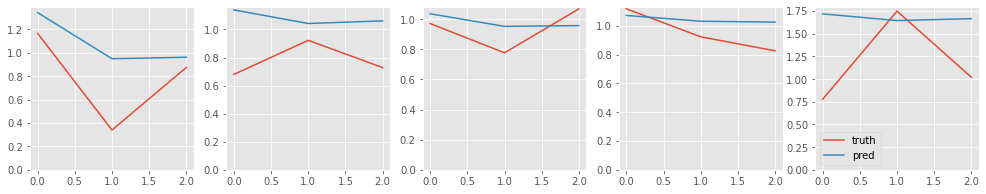

In [27]:
plt.figure(figsize=(17,3))
for id_plot, id_seq in enumerate(np.random.randint(low=0,high=len(X_test),size=5)):
    plt.subplot(1, 5, id_plot+1)
    plt.plot(y_test[id_seq], label='truth')
    plt.plot(model.predict(X_test)[id_seq], label='pred')
    plt.ylim(ymin=0)
plt.legend();

In [28]:
model.predict

<bound method Model.predict of <tensorflow.python.keras.engine.sequential.Sequential object at 0x10ec3b3d0>>

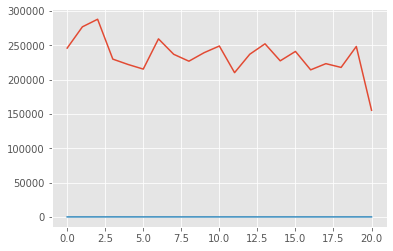

In [29]:
import matplotlib.pyplot as plt
plt.plot(history.history['mean_absolute_percentage_error'])
plt.plot(history.history['val_mean_absolute_percentage_error'])

### Model TK

In [31]:
# Loading X_train/test, y_train/test for each AR in a global dictionnary

#AR_list = preproc_data_rate.columns.levels[1].tolist()
#all_data = {}

#for AR in AR_list:
#    data = get_train_test(preproc_data_rate, 2000, 200)
#    all_data[AR] = data

In [ ]:
def init_model(AR):
    metric = metrics.MAPE
    opt = optimizers.RMSprop(learning_rate=0.005)
    
    model = models.Sequential()
    model.add(layers.LSTM(30, return_sequences=True, activation='tanh'))
    model.add(layers.LSTM(10, activation='tanh'))
    model.add(layers.Dense(5, activation='relu'))
    model.add(layers.Dense(31, activation='linear'))
    
    model.compile(loss='mse', 
                  optimizer=opt, 
                  metrics=[metric])
    
    return model

In [ ]:
# Parameters
# def get_parameters(): 
es = EarlyStopping(monitor='val_loss', verbose=1, patience=5, restore_best_weights=True)

# Fitting the model
def fit(model, AR):
    hist = model.fit(all_data[AR][0], all_data[AR][1],
            validation_split=0.3,
            epochs=5, 
            batch_size=32,
            callbacks=[es], verbose=0)
    return hist

# Evaluating the model 
def evaluate(hist, AR):
    results = hist.model.evaluate(all_data[AR][2], all_data[AR][3])
    return results

# All-in-1
def modelling(AR):
    results = evaluate(fit(init_model(AR), AR), AR)
    return results

In [ ]:
model = init_model('Centro')
fitted_model = fit(model, 'Centro')

# Multivariate LSTM Preproc - incomplete

In [24]:
##not finished...

In [25]:
def get_mult_train_test(df,n_sequences,length):
    '''Returns train and test data for X and y'''
    len_ = int(0.8*df.shape[0])
    df_train = df[:len_]
    df_test = df[len_:]
    
    test_seq = math.floor(n_sequences/4)
    
    X_train, y_train = get_X_y(df_train, n_sequences, length)
    X_test, y_test = get_X_y(df_test, test_seq, length)
    
    X_train = X_train.reshape(X_train.shape[0], X_train.shape[1],1)
    X_test = X_test.reshape(X_test.shape[0], X_test.shape[1],1)
    
    return X_train, y_train, X_test, y_test

In [78]:
preproc_data_rate

nb_crimes                                                   \
AR          Anchieta     Bangu Barra da Tijuca  Botafogo Campo Grande   
Date                                                                    
2008-12-31  0.025522  0.009079        0.011007  0.000000     0.010674   
2009-01-01  0.063703  0.047398        0.052289  0.057072     0.066402   
2009-01-02  0.031852  0.015799        0.010458  0.009512     0.045433   
2009-01-03  0.006370  0.040626        0.017430  0.014268     0.027959   
2009-01-04  0.006370  0.029341        0.006972  0.014268     0.033201   
...              ...       ...             ...       ...          ...   
2019-12-27  0.031555  0.017175        0.028888  0.082877     0.016165   
2019-12-28  0.044177  0.034350        0.022698  0.049726     0.019104   
2019-12-29  0.056799  0.015028        0.018571  0.060776     0.010287   
2019-12-30  0.031555  0.030056        0.024761  0.055251     0.011756   
2019-12-31  0.000000  0.000000        0.000000  0.000000     0.001470   

                                                                             \
AR            Centro Cidade de Deus Complexo do Alemao Copacabana Guaratiba   
Date                                                                          
2008-12-31  0.066617       0.000000           0.000000   0.034691  0.050378   
2009-01-01  0.103458       0.198661           0.000000   0.070387  0.083396   
2009-01-02  0.206917       0.000000           0.000000   0.056310  0.015163   
2009-01-03  0.103458       0.198661           0.000000   0.042232  0.037907   
2009-01-04  0.206917       0.099331           0.000000   0.035194  0.015163   
...              ...            ...                ...        ...       ...   
2019-12-27  1.117004       0.000000           0.000000   0.073479  0.007922   
2019-12-28  0.777046       0.000000           0.000000   0.155123  0.011884   
2019-12-29  0.339958       0.062570           0.016988   0.236767  0.003961   
2019-12-30  0.485654       0.031285           0.000000   0.081644  0.011884   
2019-12-31  0.000000       0.000000           0.000000   0.008164  0.000000   

            ...                                                       \
AR          ... Portuaria     Ramos  Realengo Rio Comprido   Rocinha   
Date        ...                                                        
2008-12-31  ...  0.000000  0.006877  0.026449     0.015969  0.000000   
2009-01-01  ...  0.029703  0.062168  0.046459     0.114169  0.014499   
2009-01-02  ...  0.000000  0.034538  0.025811     0.016310  0.000000   
2009-01-03  ...  0.059406  0.041445  0.041297     0.048929  0.014499   
2009-01-04  ...  0.000000  0.034538  0.036135     0.114169  0.000000   
...         ...       ...       ...       ...          ...       ...   
2019-12-27  ...  0.108767  0.036309  0.047438     0.060599  0.000000   
2019-12-28  ...  0.072512  0.036309  0.038813     0.040399  0.000000   
2019-12-29  ...  0.036256  0.029047  0.038813     0.080799  0.000000   
2019-12-30  ...  0.072512  0.021785  0.017250     0.000000  0.011689   
2019-12-31  ...  0.000000  0.000000  0.000000     0.000000  0.000000   

                                                                        
AR         Santa Cruz Santa Teresa Sao Cristovao    Tijuca Vila Isabel  
Date                                                                    
2008-12-31   0.002863     0.057947      0.052674  0.006297    0.000000  
2009-01-01   0.062111     0.000000      0.072225  0.012807    0.053311  
2009-01-02   0.028232     0.192864      0.018056  0.025613    0.038079  
2009-01-03   0.014116     0.096432      0.054169  0.019210    0.015232  
2009-01-04   0.042349     0.000000      0.126394  0.012807    0.007616  
...               ...          ...           ...       ...         ...  
2019-12-27   0.007407     0.033653      0.071630  0.091264    0.050575  
2019-12-28   0.004938     0.067305      0.071630  0.022816    0.057800  
2019-12-29   0.012346     0.067305      0.071630  0.022816    0.02890

In [69]:
preproc_data_n["nb_crimes"].loc[:,"Bangu"]

Date
2008-12-31     4
2009-01-01    21
2009-01-02     7
2009-01-03    18
2009-01-04    13
              ..
2019-12-27     8
2019-12-28    16
2019-12-29     7
2019-12-30    14
2019-12-31     0
Name: Bangu, Length: 4018, dtype: int64

In [32]:
import preproc
from preproc import clean_pop_data

In [35]:
pop_region = clean_pop_data()

In [79]:
pop_region

,Ano,Populacao,administrative_regions
0,2000,39973.0,Portuaria
1,2001,39246.0,Portuaria
2,2002,38519.0,Portuaria
3,2003,37792.0,Portuaria
4,2004,37065.0,Portuaria
...,...,...,...
667,2016,32933.8,Cidade de Deus
668,2017,32610.6,Cidade de Deus
669,2018,32287.4,Cidade de Deus
670,2019,31964.2,Cidade de Deus


In [75]:
total = pop_region[pop_region.Ano>=2009].Populacao.sum()

In [77]:
preproc_data_n.T.sum()/total *1000

Date
2008-12-31    0.000928
2009-01-01    0.004091
2009-01-02    0.001940
2009-01-03    0.002236
2009-01-04    0.002053
                ...   
2019-12-27    0.003304
2019-12-28    0.003149
2019-12-29    0.002756
2019-12-30    0.002601
2019-12-31    0.000028
Length: 4018, dtype: float64

In [43]:
pop_region.administrative_regions.unique()

array(['Portuaria', 'Centro', 'Rio Comprido', 'Botafogo', 'Copacabana',
       'Lagoa', 'Sao Cristovao', 'Tijuca', 'Vila Isabel', 'Ramos',
       'Penha (2)', 'Inhauma', 'Meier', 'Iraja', 'Madureira',
       'Jacarepagua', 'Bangu', 'Campo Grande', 'Santa Cruz',
       'Ilha do Governador', 'Ilha de Paqueta', 'Anchieta',
       'Santa Teresa', 'Barra da Tijuca', 'Pavuna', 'Guaratiba',
       'Rocinha', 'Jacarezinho', 'Complexo do Alemao', 'Mare', 'Realengo',
       'Cidade de Deus'], dtype=object)

In [81]:
a=[1,2,3,4]

In [86]:
a[2:],a[0:2]

([3, 4], [1, 2])